**Now that I have accessed and sorted my data through Google Cloud's BigQuery, I will be using python to create visualizations for the data. Such as plots, numeric statistics, and other values.**

In [1]:
import pandas as pd
GPU_Data = pd.read_csv('GPU_Benchmarks_Specs.csv')
GPU_Data

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category,manufacturer,...,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,Radeon RX Vega 64,14636,810,799.99,18.30,295.0,49.62,2017,Desktop,AMD,...,945,4096.0,256,64,NaN,NaN,False,PCIe 3.0 x16,HBM2,Vega 10
1,Radeon Vega Frontier Edition,13748,753,1679.99,8.18,350.0,39.28,2017,Desktop,AMD,...,945,4096.0,256,64,NaN,NaN,False,PCIe 3.0 x16,HBM2,Vega 10
2,Radeon Pro Duo,8324,715,1199.06,6.94,350.0,23.78,2016,Desktop,AMD,...,500,4096.0,256,64,NaN,NaN,False,PCIe 3.0 x16,HBM,Capsaicin
3,Radeon X1550,67,253,155.00,0.43,27.0,2.47,2009,Desktop,ATI,...,333,NaN,4,4,4.0,2.0,False,PCIe 1.0 x16,DDR2,RV505
4,Radeon X1550,67,253,155.00,0.43,27.0,2.47,2009,Desktop,ATI,...,400,NaN,4,4,4.0,2.0,False,PCIe 1.0 x16,DDR2,RV515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Radeon RX Vega 56,13636,784,752.99,18.11,210.0,64.93,2017,Desktop,AMD,...,800,3584.0,224,64,NaN,NaN,False,PCIe 3.0 x16,HBM2,Vega 10
188,GeForce GTX TITAN Z,9189,648,1515.00,6.07,375.0,24.50,2014,Desktop,NVIDIA,...,1750,2880.0,240,48,NaN,NaN,False,PCIe 3.0 x16,GDDR5,GK110B
189,GeForce GTX 780 Ti,9312,626,339.99,27.39,250.0,37.25,2013,Desktop,NVIDIA,...,1753,2880.0,240,48,NaN,NaN,False,PCIe 3.0 x16,GDDR5,GK110B
190,Radeon RX 6800,20667,1030,758.99,27.23,250.0,82.67,2020,Desktop,AMD,...,2000,3840.0,240,96,NaN,NaN,False,PCIe 4.0 x16,GDDR6,Navi 21


In [2]:
GPU_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           192 non-null    object 
 1   G3Dmark           192 non-null    int64  
 2   G2Dmark           192 non-null    int64  
 3   price             192 non-null    float64
 4   gpuValue          192 non-null    float64
 5   TDP               192 non-null    float64
 6   powerPerformance  192 non-null    float64
 7   testDate          192 non-null    int64  
 8   category          192 non-null    object 
 9   manufacturer      192 non-null    object 
 10  productName       192 non-null    object 
 11  releaseYear       192 non-null    int64  
 12  memSize           192 non-null    float64
 13  memBusWidth       192 non-null    int64  
 14  gpuClock          192 non-null    int64  
 15  memClock          192 non-null    int64  
 16  unifiedShader     188 non-null    float64
 1

<Axes: >

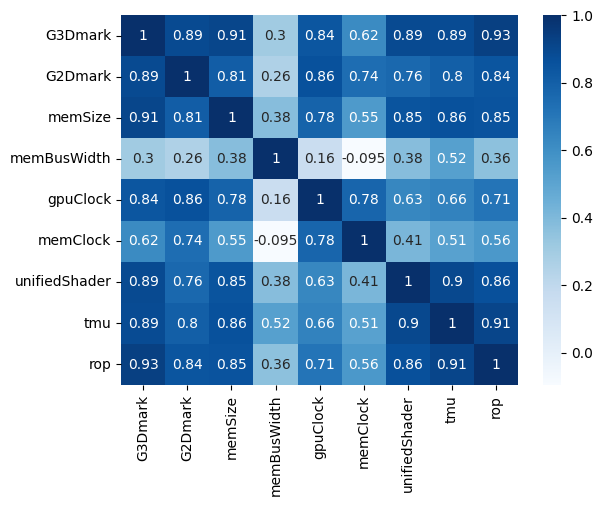

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
dataset = GPU_Data
dataframe = pd.DataFrame(data=dataset, columns=('G3Dmark','G2Dmark','memSize','memBusWidth','gpuClock','memClock','unifiedShader','tmu','rop'))
dataframe["G3Dmark"] = dataset.G3Dmark
matrix = dataframe.corr()

# plotting correlation matrix
sns.heatmap(matrix, cmap="Blues", annot=True)


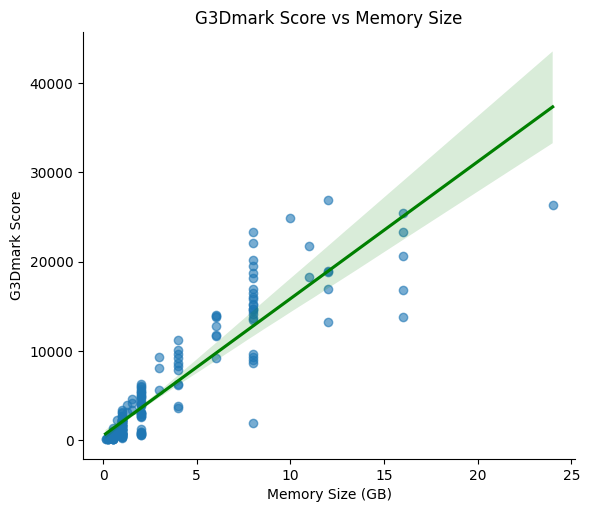

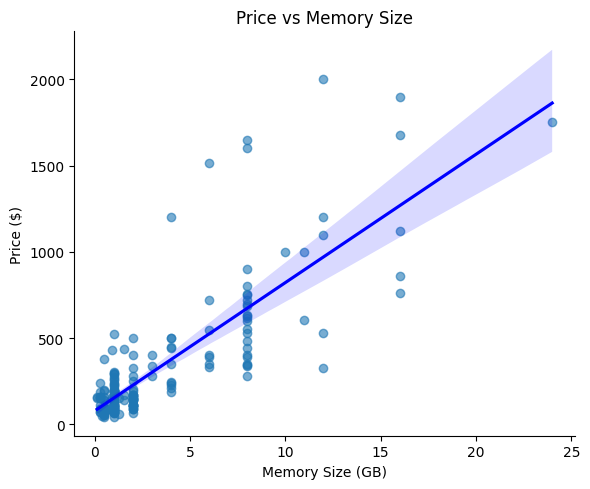

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x = GPU_Data['memSize']
y1 = GPU_Data['G3Dmark']
y2 = GPU_Data['price']
dataframe2 = pd.DataFrame(GPU_Data)
df_melted = dataframe2.melt(id_vars=["memSize"], value_vars=["G3Dmark","price"], var_name="Metric", value_name="Value")

sns.lmplot(data=dataframe2, x="memSize", y="G3Dmark", scatter_kws={"alpha": 0.6}, line_kws={"color": "g"}, height=5, aspect=1.2)
plt.xlabel("Memory Size (GB)")
plt.ylabel("G3Dmark Score")
plt.title("G3Dmark Score vs Memory Size")

sns.lmplot(data=dataframe2, x="memSize", y="price", scatter_kws={"alpha": 0.6}, line_kws={"color": "b"}, height=5, aspect=1.2)
plt.xlabel("Memory Size (GB)")
plt.ylabel("Price ($)")
plt.title("Price vs Memory Size")

plt.tight_layout()
plt.show()

In [5]:
eight_gb = (GPU_Data["memSize"] == 8)
GPU_eight_gb = GPU_Data[eight_gb]
print(sum(GPU_eight_gb['memSize'] == 8) == len(GPU_eight_gb['memSize']))

twelve_gb = (GPU_Data["memSize"] == 12)
GPU_twelve_gb = GPU_Data[twelve_gb]
print(sum(GPU_twelve_gb['memSize'] == 12) == len(GPU_twelve_gb['memSize']))

True
True


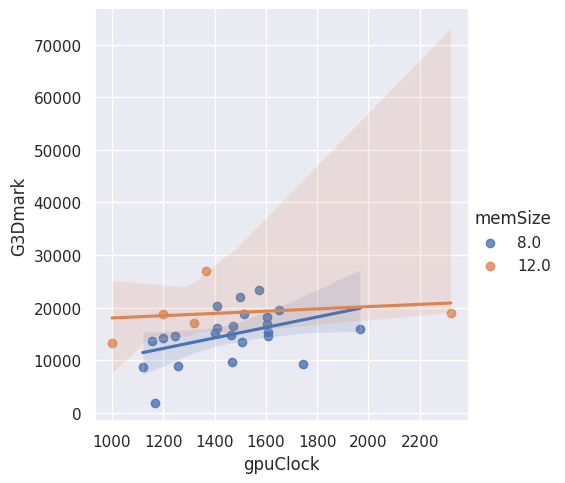

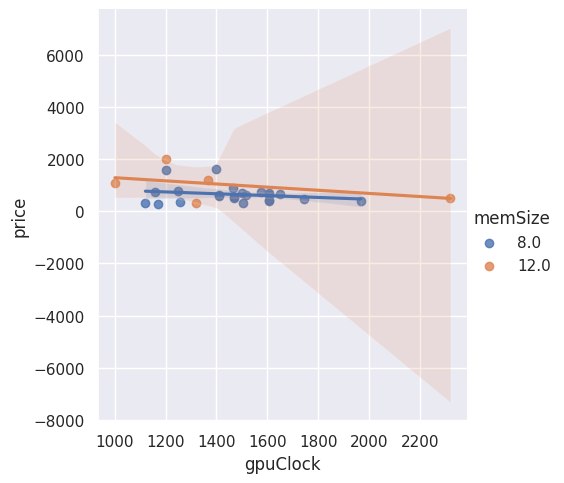

In [6]:
GPU_memSize_merged = pd.concat([GPU_eight_gb, GPU_twelve_gb], ignore_index=False, sort=False)

import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lmplot(x="gpuClock", y="G3Dmark", hue="memSize", data=GPU_memSize_merged)
sns.lmplot(x="gpuClock", y="price", hue="memSize", data=GPU_memSize_merged)

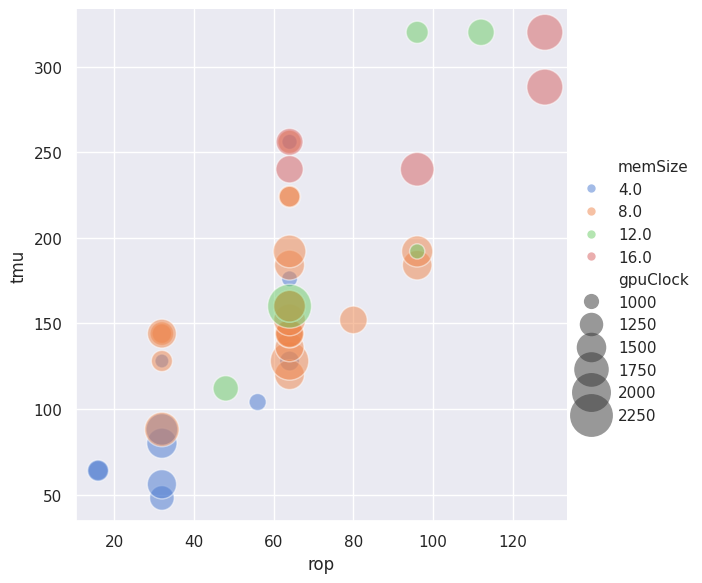

In [7]:
four_gb = (GPU_Data["memSize"] == 4)
GPU_four_gb = GPU_Data[four_gb]

sixteen_gb = (GPU_Data["memSize"] == 16)
GPU_sixteen_gb = GPU_Data[sixteen_gb]

GPU_memSize_merged2 = pd.concat([GPU_four_gb, GPU_eight_gb, GPU_twelve_gb, GPU_sixteen_gb], ignore_index=False, sort=False)

sns.relplot(x="rop", y="tmu", hue="memSize", size="gpuClock",
            sizes=(100, 1000), alpha=.5, palette="muted",
            height=6, data=GPU_memSize_merged2)

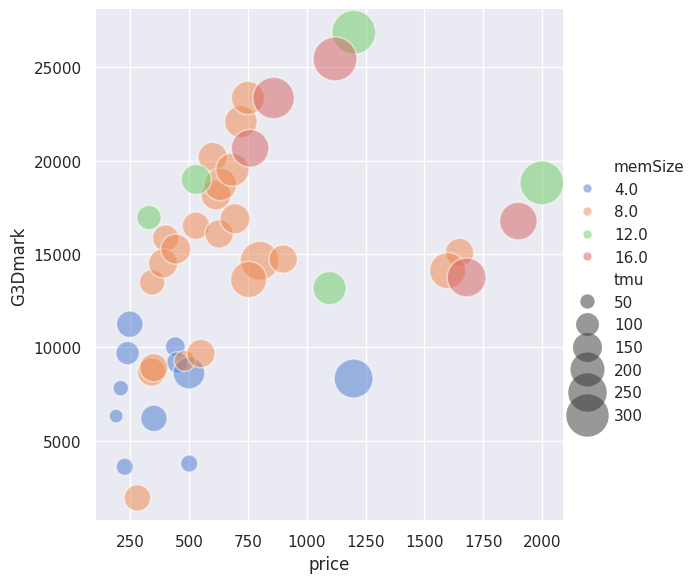

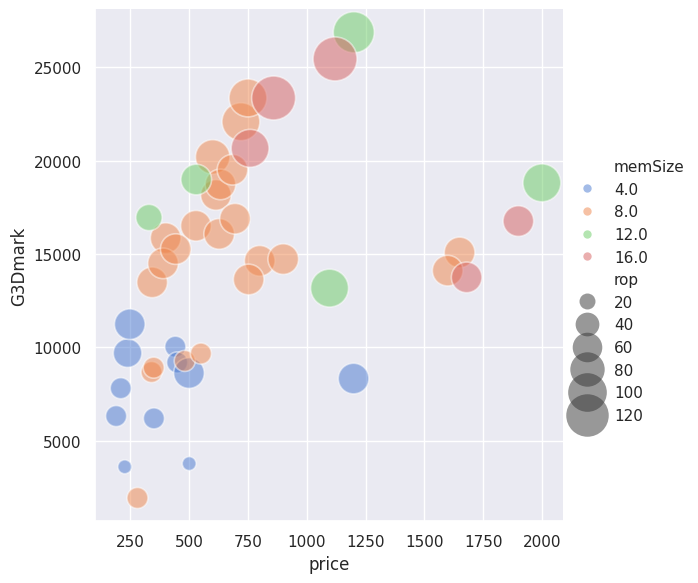

In [8]:
sns.relplot(x="price", y="G3Dmark", hue="memSize", size="tmu",
            sizes=(100, 1000), alpha=.5, palette="muted",
            height=6, data=GPU_memSize_merged2)

sns.relplot(x="price", y="G3Dmark", hue="memSize", size="rop",
            sizes=(100, 1000), alpha=.5, palette="muted",
            height=6, data=GPU_memSize_merged2)

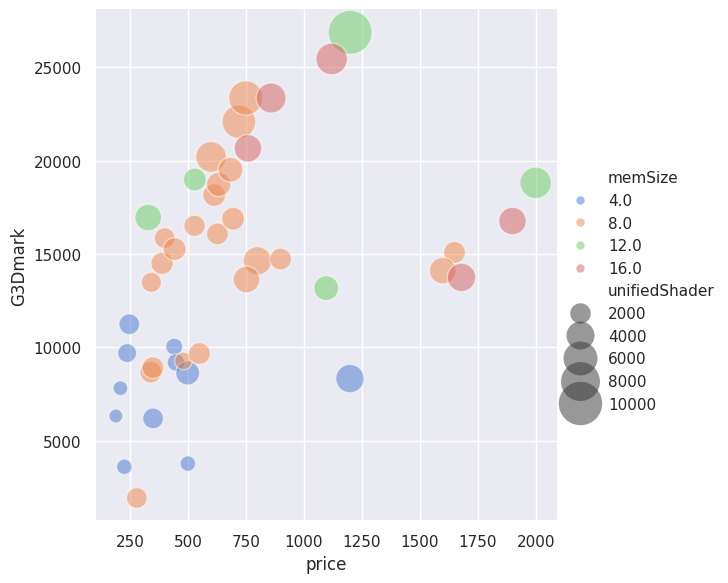

In [10]:
sns.relplot(x="price", y="G3Dmark", hue="memSize", size="unifiedShader",
            sizes=(100, 1000), alpha=.5, palette="muted",
            height=6, data=GPU_memSize_merged2)